In [43]:

import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import os
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout, Input

tf.__version__

'2.0.0'

In [65]:
print("\n".join(os.listdir("./")))
df = pd.read_csv('DJI_modified_sma.csv')

stock_can_change_our_world.ipynb
README.md
downjone5y.csv
DJI_modified_sma.csv
.ipynb_checkpoints
DJI_modified_features - DJI.csv
.git
stock_can_change_our_world-sma.ipynb
saved_model
dowjone1985_2019.csv
.DS_Store


In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,sma5,sma10,sma25,sma75,sma125,sma200
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000,1292.619995,1292.619995,1292.619995,1292.619995,1292.619995,1292.619995
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000,1287.880005,1287.880005,1287.880005,1287.880005,1287.880005,1287.880005
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000,1286.770020,1286.770020,1286.770020,1286.770020,1286.770020,1286.770020
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000,1277.719971,1277.719971,1277.719971,1277.719971,1277.719971,1277.719971
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000,1287.013989,1290.079956,1290.079956,1290.079956,1290.079956,1290.079956


In [18]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma10,sma25,sma75,sma125,sma200
count,8762.000000,8762.000000,8762.000000,8762.000000,8762.000000,8.762000e+03,8762.000000,8762.000000,8762.000000,8762.000000,8762.000000,8762.000000
mean,9741.540516,9800.407342,9680.969127,9744.180560,9744.180560,1.387696e+08,9738.288319,9730.964669,9709.143362,9636.784488,9564.918578,9458.638821
std,6379.993445,6406.101221,6351.951044,6380.505213,6380.505213,1.218227e+08,6375.645973,6369.877839,6353.093276,6298.411546,6243.063416,6160.864855
min,1243.709961,1251.209961,1235.530029,1242.050049,1242.050049,2.530000e+06,1246.420020,1253.411023,1261.478818,1242.050049,1242.050049,1242.050049
25%,3614.900086,3635.000000,3595.430053,3616.775024,3616.775024,2.666250e+07,3616.110974,3611.814222,3598.590109,3561.849625,3522.914113,3460.122220
50%,9958.229981,10031.165040,9873.945312,9958.939942,9958.939942,1.047850e+08,9955.690039,9966.947461,10013.490235,10006.442710,9937.613086,9844.902081
75%,12604.689700,12672.895020,12536.984863,12608.264892,12608.264892,2.266075e+08,12590.240043,12576.958180,12560.957970,12505.968420,12464.211825,12284.940260
max,27364.689450,27398.679690,27294.169920,27359.160160,27359.160160,2.190810e+09,27293.928120,27255.588090,27026.882730,26657.372450,26448.710060,26196.764980


In [19]:
df = df.drop('Adj Close', axis=1)

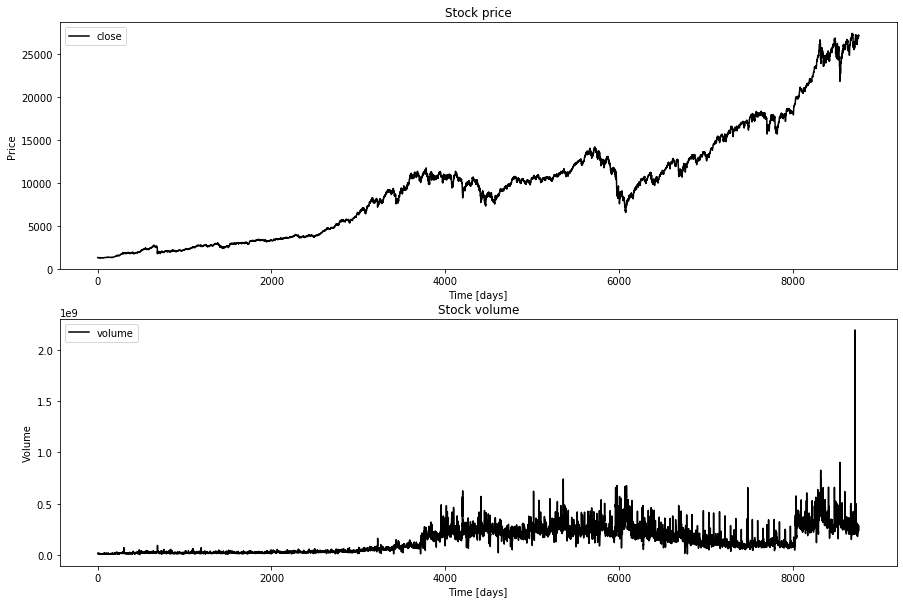

In [24]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(df['Close'], color='black', label='close')
plt.title('Stock price')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')


plt.subplot(2, 1, 2)
plt.plot(df['Volume'], color='black', label='volume')
plt.title('Stock volume')
plt.xlabel('Time [days]')
plt.ylabel('Volume')
plt.legend(loc='best')

In [25]:
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df['Open'].to_numpy().reshape(-1, 1))
    df['Low'] = min_max_scaler.fit_transform(df['Low'].to_numpy().reshape(-1, 1))    
    df['High'] = min_max_scaler.fit_transform(df['High'].to_numpy().reshape(-1, 1))    
    df['Close'] = min_max_scaler.fit_transform(df['Close'].to_numpy().reshape(-1, 1))
    df['sma5'] = min_max_scaler.fit_transform(df['sma5'].to_numpy().reshape(-1, 1))
    df['sma10'] = min_max_scaler.fit_transform(df['sma10'].to_numpy().reshape(-1, 1))
    df['sma25'] = min_max_scaler.fit_transform(df['sma25'].to_numpy().reshape(-1, 1))
    df['sma75'] = min_max_scaler.fit_transform(df['sma75'].to_numpy().reshape(-1, 1))
    df['sma125'] = min_max_scaler.fit_transform(df['sma125'].to_numpy().reshape(-1, 1))
    df['sma200'] = min_max_scaler.fit_transform(df['sma200'].to_numpy().reshape(-1, 1))
    #df['Volume'] = min_max_scaler.fit_transform(df['Volume'].to_numpy().reshape(-1, 1))  
    return df

def load_data(stock, seq_len):
    data_raw = stock.as_matrix()
    data = list()
    for index in range(len(data_raw) - seq_len):
        data.append(data_raw[index: index+seq_len])
    data = np.array(data)
    val_set_size = int(np.round(val_set_size_percentage/100*data.shape[0]))
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]))
    train_set_size = data.shape[0] - (val_set_size + test_set_size)
    
    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]
    
    x_val = data[train_set_size:train_set_size + val_set_size, :-1, :]
    y_val = data[train_set_size:train_set_size + val_set_size, -1, :]
    
    x_test = data[train_set_size+val_set_size:,:-1,:]
    y_test = data[train_set_size+val_set_size:,-1,:]
    
    return [x_train, y_train, x_val, y_val, x_test, y_test]

In [26]:
df_index = df.drop('Date', axis=1)
df_index = df_index.drop('Volume', axis=1)


cols = list(df_index.columns.values)
print('Col : ', cols)

# rearrange columns ,for training with volume
# n_cols = cols[:3] + [cols[-1]] + [cols[-2]]
# df_index = df_index[n_cols] 

# print("new Cols: ",list(df_index.columns.values))





# parameter for preprocessing #

val_set_size_percentage = 10
test_set_size_percentage = 10
seq_len = 20

#*****************************#

# normalize index
df_index_norm = normalize_data(df_index)

# split train, val, test data

x_train, y_train, x_val, y_val, x_test, y_test = load_data(df_index_norm, seq_len)

print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_val.shape = ', x_val.shape)
print('y_val.shape = ', y_val.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)

Col :  ['Open', 'High', 'Low', 'Close', 'sma5', 'sma10', 'sma25', 'sma75', 'sma125', 'sma200']
x_train.shape =  (6994, 19, 10)
y_train.shape =  (6994, 10)
x_val.shape =  (874, 19, 10)
y_val.shape =  (874, 10)
x_test.shape =  (874, 19, 10)
y_test.shape =  (874, 10)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [28]:
print(y_train[0]);
print("\n")
print(x_train[0]); 

[0.00124689 0.00160513 0.00141143 0.00168701 0.00130162 0.00112502
 0.00095598 0.0017336  0.00174795 0.0017656 ]


[[0.00130202 0.00169347 0.00120344 0.00193628 0.00177368 0.00150791
  0.00120864 0.00198974 0.00200621 0.00202647]
 [0.00205429 0.002061   0.00166548 0.00175479 0.00159171 0.00132562
  0.00102468 0.00180324 0.00181817 0.00183652]
 [0.00151334 0.00161354 0.0014241  0.00171229 0.00154909 0.00128293
  0.0009816  0.00175957 0.00177413 0.00179204]
 [0.00127216 0.00133474 0.00131396 0.00136577 0.00120165 0.00093488
  0.00063035 0.00140348 0.0014151  0.00142939]
 [0.0010861  0.00167244 0.00128403 0.00183902 0.00155846 0.00141023
  0.00111006 0.0018898  0.00190545 0.00192468]
 [0.00192757 0.00190917 0.00165281 0.00165332 0.00150172 0.0012237
  0.00092182 0.00169897 0.00171304 0.00173033]
 [0.00157651 0.00165561 0.00151734 0.00147566 0.00144574 0.00104526
  0.00074174 0.0015164  0.00152896 0.00154439]
 [0.00158072 0.00175275 0.00169925 0.00183902 0.00147116 0.00141023
  0.00111006 

In [29]:
df_index.head(20)

,Open,High,Low,Close,sma5,sma10,sma25,sma75,sma125,sma200
0,0.001302,0.001693,0.001203,0.001936,0.001774,0.001508,0.001209,0.001990,0.002006,0.002026
1,0.002054,0.002061,0.001665,0.001755,0.001592,0.001326,0.001025,0.001803,0.001818,0.001837
2,0.001513,0.001614,0.001424,0.001712,0.001549,0.001283,0.000982,0.001760,0.001774,0.001792
3,0.001272,0.001335,0.001314,0.001366,0.001202,0.000935,0.000630,0.001403,0.001415,0.001429
4,0.001086,0.001672,0.001284,0.001839,0.001558,0.001410,0.001110,0.001890,0.001905,0.001925
5,0.001928,0.001909,0.001653,0.001653,0.001502,0.001224,0.000922,0.001699,0.001713,0.001730
6,0.001577,0.001656,0.001517,0.001476,0.001446,0.001045,0.000742,0.001516,0.001529,0.001544
7,0.001581,0.001753,0.001699,0.001839,0.001471,0.001410,0.001110,0.001890,0.001905,0.001925
8,0.001775,0.001757,0.001759,0.001835,0.001565,0.001406,0.001106,0.001885,0.001901,0.001920
9,0.001695,0.001550,0.001271,0.001302,0.001458,0.001242,0.000566,0.001338,0.001349,0.001363


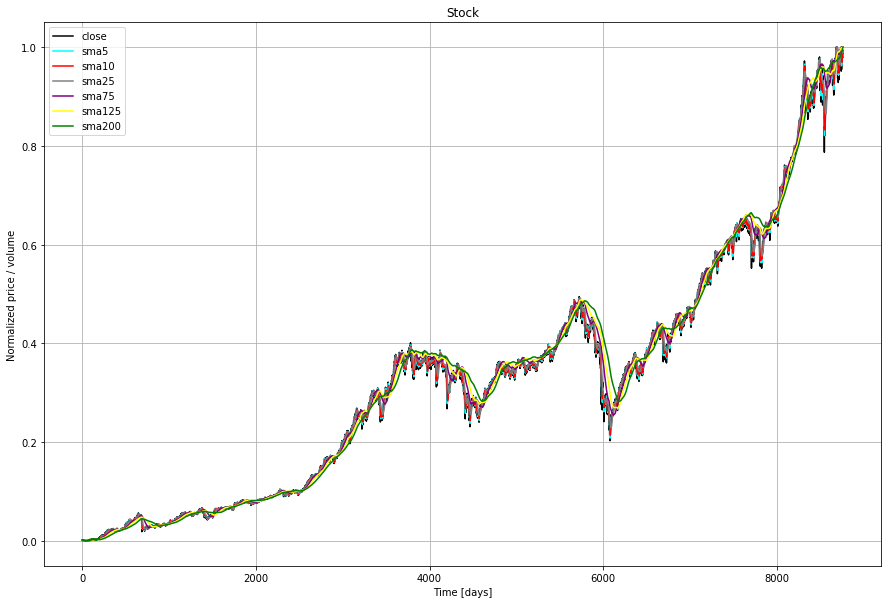

In [35]:
plt.figure(figsize=(15, 10))
plt.grid(True)
plt.plot(df_index_norm['Close'], color='black', label='close')
plt.plot(df_index_norm['sma5'], color='cyan', label='sma5')
plt.plot(df_index_norm['sma10'], color='red', label='sma10')
plt.plot(df_index_norm['sma25'], color='gray', label='sma25')
plt.plot(df_index_norm['sma75'], color='purple', label='sma75')
plt.plot(df_index_norm['sma125'], color='yellow', label='sma125')
plt.plot(df_index_norm['sma200'], color='green', label='sma200')
plt.title('Stock')
plt.xlabel('Time [days]')
plt.ylabel('Normalized price / volume')
plt.legend(loc='best')
plt.show()

In [54]:
from tensorflow.keras import backend as K
K.clear_session()

In [55]:
from tensorflow.keras.layers import Bidirectional,TimeDistributed,BatchNormalization,Flatten
n_steps = seq_len - 1

def get_bi_gru():
    
    input1 = Input(shape=(19,10,))
    x = Bidirectional(LSTM(200,activation='relu', return_sequences=True))(input1)
    x = TimeDistributed(BatchNormalization())(x)
    x = LSTM(200,activation='relu')(x)
    #x = Dense(200,activation='relu')(x)
    x = (BatchNormalization())(x)
    out = Dense(10,activation='linear')(x)

    
    
    model = Model(inputs=input1, outputs=out)
    model.compile(optimizer=Adam(0.005),
                loss='mse',
                metrics=['mse'])   
    
    return model

In [56]:
model = get_bi_gru()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19, 10)]          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 19, 400)           337600    
_________________________________________________________________
time_distributed (TimeDistri (None, 19, 400)           1600      
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               480800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense (Dense)                (None, 10)                2010      
Total params: 822,810
Trainable params: 821,610
Non-trainable params: 1,200
___________________________________________________

In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
print('start training ')


weight_path_model = "saved_model/model_sma_NoVOL.h5"
callbacks_list_model = [
    ModelCheckpoint(
             weight_path_model,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=2
        ),
    ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, min_lr=0.0001)
]

#################
batch_size = 256
epochs = 100
#################

history = model.fit(x_train, y_train, epochs=epochs, verbose=2, callbacks=callbacks_list_model,
          validation_data=(x_val, y_val),batch_size=batch_size) #batch_size=batch_size




start training 
Train on 6994 samples, validate on 874 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 151.29899, saving model to saved_model/model_AllFeature_NoVOL.h5
6994/6994 - 49s - loss: 0.3731 - mse: 0.3731 - val_loss: 151.2990 - val_mse: 151.2990
Epoch 2/100

Epoch 00002: val_loss did not improve from 151.29899
6994/6994 - 32s - loss: 0.0279 - mse: 0.0279 - val_loss: 3462.9946 - val_mse: 3462.9944
Epoch 3/100

Epoch 00003: val_loss improved from 151.29899 to 35.93860, saving model to saved_model/model_AllFeature_NoVOL.h5
6994/6994 - 32s - loss: 0.0193 - mse: 0.0193 - val_loss: 35.9386 - val_mse: 35.9386
Epoch 4/100

Epoch 00004: val_loss improved from 35.93860 to 6.50548, saving model to saved_model/model_AllFeature_NoVOL.h5
6994/6994 - 33s - loss: 0.0133 - mse: 0.0133 - val_loss: 6.5055 - val_mse: 6.5055
Epoch 5/100

Epoch 00005: val_loss improved from 6.50548 to 4.14901, saving model to saved_model/model_AllFeature_NoVOL.h5
6994/6994 - 33s - loss: 0.0024 - mse:

Epoch 44/100

Epoch 00044: val_loss improved from 0.25816 to 0.24888, saving model to saved_model/model_AllFeature_NoVOL.h5
6994/6994 - 33s - loss: 1.5751e-04 - mse: 1.5751e-04 - val_loss: 0.2489 - val_mse: 0.2489
Epoch 45/100

Epoch 00045: val_loss improved from 0.24888 to 0.24082, saving model to saved_model/model_AllFeature_NoVOL.h5
6994/6994 - 32s - loss: 2.1200e-04 - mse: 2.1200e-04 - val_loss: 0.2408 - val_mse: 0.2408
Epoch 46/100

Epoch 00046: val_loss improved from 0.24082 to 0.23265, saving model to saved_model/model_AllFeature_NoVOL.h5
6994/6994 - 33s - loss: 2.9984e-04 - mse: 2.9984e-04 - val_loss: 0.2327 - val_mse: 0.2327
Epoch 47/100

Epoch 00047: val_loss improved from 0.23265 to 0.21989, saving model to saved_model/model_AllFeature_NoVOL.h5
6994/6994 - 33s - loss: 2.3932e-04 - mse: 2.3932e-04 - val_loss: 0.2199 - val_mse: 0.2199
Epoch 48/100

Epoch 00048: val_loss improved from 0.21989 to 0.21088, saving model to saved_model/model_AllFeature_NoVOL.h5
6994/6994 - 32s - lo

Epoch 84/100

Epoch 00084: val_loss improved from 0.00097 to 0.00083, saving model to saved_model/model_AllFeature_NoVOL.h5
6994/6994 - 32s - loss: 2.2858e-04 - mse: 2.2858e-04 - val_loss: 8.2820e-04 - val_mse: 8.2820e-04
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.00083
6994/6994 - 32s - loss: 3.1703e-04 - mse: 3.1703e-04 - val_loss: 8.4055e-04 - val_mse: 8.4055e-04
Epoch 86/100

Epoch 00086: val_loss improved from 0.00083 to 0.00073, saving model to saved_model/model_AllFeature_NoVOL.h5
6994/6994 - 32s - loss: 1.5724e-04 - mse: 1.5724e-04 - val_loss: 7.2924e-04 - val_mse: 7.2924e-04
Epoch 87/100

Epoch 00087: val_loss did not improve from 0.00073
6994/6994 - 32s - loss: 1.5713e-04 - mse: 1.5713e-04 - val_loss: 8.3762e-04 - val_mse: 8.3762e-04
Epoch 88/100

Epoch 00088: val_loss improved from 0.00073 to 0.00066, saving model to saved_model/model_AllFeature_NoVOL.h5
6994/6994 - 32s - loss: 1.7090e-04 - mse: 1.7090e-04 - val_loss: 6.5954e-04 - val_mse: 6.5954e-04
Epoch 89

In [59]:
#from tensorflow.keras.models import load_model
#model = load_model("saved_model/model_sma_NoVOL.h5")


In [60]:
x_train.shape
y_train.shape

(6994, 10)

In [61]:
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

In [62]:
print(y_test_pred[0])

[0.63827425 0.68686736 0.6173228  0.61277914 0.5811784  0.6553715
 0.6805582  0.6824351  0.6438986  0.6472229 ]


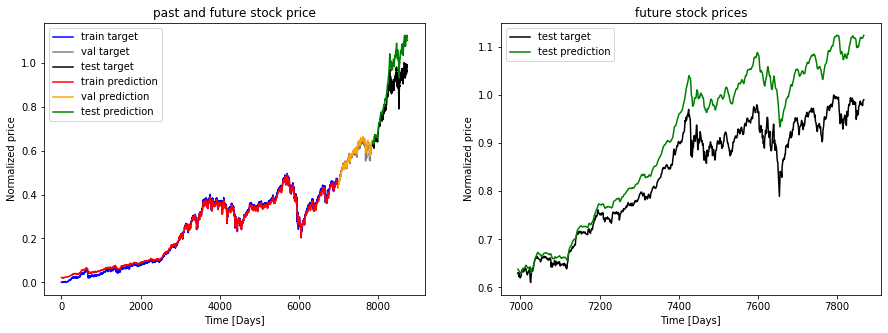

In [63]:
ft = 0
 
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

plt.plot(np.arange(y_train.shape[0]), y_train[:, ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_val.shape[0]), y_val[:, ft], 
         color='gray', label='val target')
plt.plot(np.arange(y_train.shape[0] + y_val.shape[0], y_train.shape[0] + y_val.shape[0] + y_test.shape[0]),
        y_test[:, ft], color='black', label='test target')
plt.plot(np.arange(y_train_pred.shape[0]), y_train_pred[:, ft],
        color='red', label='train prediction') 
plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0] + y_val_pred.shape[0]),
        y_val_pred[:, ft], color='orange', label='val prediction')
plt.plot(np.arange(y_train_pred.shape[0] + y_val_pred.shape[0],
        y_train_pred.shape[0] + y_val_pred.shape[0] + y_test_pred.shape[0]),
        y_test_pred[:, ft], color ='green', label='test prediction')
plt.title('past and future stock price')
plt.xlabel('Time [Days]')
plt.ylabel('Normalized price')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_test.shape[0]),
        y_test[:, ft], color='black', label='test target')
plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_test_pred.shape[0]),
        y_test_pred[:, ft], color='green', label='test prediction')
plt.title('future stock prices')
plt.xlabel('Time [Days]')
plt.ylabel('Normalized price')
plt.legend(loc='best')



In [64]:
evaluate(x_test,y_test)

NameError: name 'evaluate' is not defined